# ANOTACIONES
 En principio si es una clasificación binaria solo deberias tener que cambiar los siguientes apartados :
 
[1 - Carga de fichero](#1)

[2 - Columna a predecir](#2)

[3 - Carga de datos para clasificación](#3)

En caso de ser multiclase deberás además cambiar las siguientes filas [2 - Columna a predecir](#2):

*`#NUMERO DE CLASES
clases= 2
#para la matriz de confusion
#0 -> No sobrepeso 1 -> Sobrepeso
array_clases = ['No sobrepeso' ,'Sobrepeso']
`*

Una vez definido tu fichero y cargado los datos puedes ejecutar todas las celdas.
Te he dejado después de Gradient Boosting un [ejemplo de la herramienta SHAP](#4.1.1) que sirve para ver el impacto de las variables en modelos de caja negra.
 
## Índice
 
[0 - Librerias](#0)

[1 - Carga de fichero](#1)

[2 - Columna a predecir](#2)

[3 - Carga de datos para clasificación](#3)

[plot_confusion_matrix](#3)

[4 - Clasificadores](#4)

&ensp;[4.1 - Gradient Boosting](#4.1)

&ensp;&ensp;[4.1.1 - Ejemplo Shap](#4.1.1)

&ensp;[4.2 - Gradient Boosting con validacion cruzada](#4.2)

&ensp;[4.3 - Logistic Regression](#4.3)

&ensp;[4.4 - Random Forest Regressor](#4.4)

&ensp;[4.5 - RandomForestClassifier](#4.5)

&ensp;[4.6 - GridSearchCV ](#4.6)

&ensp;[4.7 - GaussianProcessClassifier](#4.7)

&ensp;[4.8 - Gaussian Naive Bayes](#4.8)

&ensp;[4.9 - Bernoulli Naive Bayes](#4.9)

&ensp;[4.10 - DecisionTreeClassifier](#4.10)

&ensp;[4.11 - AdaBoostClassifier](#4.11)

&ensp;[4.12 - BaggingClassifier](#4.12)

&ensp;[4.13 - ExtraTreesClassifier](#4.13)

&ensp;[4.14 - SGDClassifier](#4.14)

&ensp;[4.15 - MLPClassifier](#4.15)


# <a id = "0">0 - Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
#import shap
from IPython.display import display, Markdown
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

from statsmodels.tools.eval_measures import rmse # Para calcular el error
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
from math import sqrt


%matplotlib inline
%config IPCompleter.greedy=True
warnings.filterwarnings('ignore')

## <a id = "1">1 - CARGA DE FICHERO <span style="color:green">(DEPENDE DE CADA CASO) </span><a>

In [3]:

#cargamos fichero
#datos=pd.read_excel("filtradoV3.xlsx") #IPAQ Y CALIPAQ
#datos=datos.drop(['n','weight','height','cal_IPAQ','center'], axis=1)
#datos['exsmokerY']= datos['exsmokerY'] / datos['age']

#datos.reset_index(drop=True, inplace=True)


## <a id = "2"> 2 - COLUMNA A PREDECIR  <span style="color:green">(DEPENDE DE CADA CASO) </span>

In [6]:
#NUMERO DE CLASES
clases= 2
#para la matriz de confusion
# 0 -> No sobrepeso 1 -> Sobrepeso
array_clases = ['No' ,'Si']
#COLUMNA A PREDECIR, EN ESTE CASO ES IMC -> LABEL
df = pd.read_csv('heart_2020_cleaned.csv')
datos= df.rename(columns={'HeartDisease': 'label'})

## <a id = "3">3 - CARGA DE DATOS PARA CLASIFICACIÓN  <span style="color:green">(DEPENDE DE CADA CASO) </span>
Siempre antes de ejecutar esta celda debes ejecutar las dos anteriores

In [7]:
#INDICE DE IMC A EVALAR
#IMC=25



#SE GENERA LOS VALORES DE 0 1 PARA LA CLASIFIACIÓN BINARIA
# EN ESTE CASO 0 PARA AQUELLOS CON IMC INFERIOR A 25 Y VICEVERSA
#datos.loc[datos.label <IMC, 'label'] = 0
#datos.loc[datos.label >=IMC, 'label'] = 1

#hombres = datos.loc[datos.sex==0]
#datos=hombres
#mujeres = datos.loc[datos.sex==1]
#datos=mujeres

#datos.reset_index(drop=True, inplace=True)
#print("Usuarios Totales-->"+str(len(datos)))

# ENTRENAMIENTO Y TEST
#75% ENTRENAMIENTO 25% TEST
#train_features, test_features = train_test_split(datos, test_size=0.25)

#SEPARAMOS DE LOS CONJUNTOS DE ENTRENAMIENTO Y TEST LA COLUMNA A PREDECIR
train_labels = train_y['label'] #Y
test_labels = test_y['label'] #Y

train_features =train_features.drop('label', axis=1) #X
test_features =test_features.drop('label', axis=1) #X

columnas = list(train_features)
print("Usuarios Entrenamiento: "+str(len(train_features)))
print("Usuarios Test: "+str(len(test_features)))
print("Casos de clase 0 en entrenamiento: "+str(len(train_labels.loc[train_labels==0])))
print("Casos de clase 1 en entrenamiento: "+str(len(train_labels.loc[train_labels==1])))
print("Casos de clase 0 en test: "+str(len(test_labels.loc[test_labels==0])))
print("Casos de clase 1 en test: "+str(len(test_labels.loc[test_labels==1])))
print("Numero de columnas :"+str(len(columnas)))
print("Columnas a usar:")
print(columnas)

NameError: name 'train_y' is not defined

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# <a id = "4">4 - CLASIFICADORES

## <a id = "4.1"> 4.1 - Gradient Boosting

Correct classification rate: 0.735593220338983
              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76       160
         1.0       0.71      0.71      0.71       135

    accuracy                           0.74       295
   macro avg       0.73      0.73      0.73       295
weighted avg       0.74      0.74      0.74       295

Confusion matrix, without normalization
[[121  39]
 [ 39  96]]


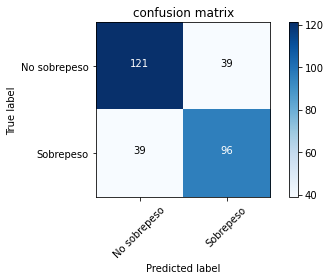

In [ ]:
#Gradient Boosting

modelo = GradientBoostingClassifier(loss='deviance', random_state=0)

modelo.fit(train_features, train_labels)

prediccion = modelo.predict(test_features)

report = classification_report(test_labels, prediccion)
rms = sqrt(mean_squared_error(test_labels, prediccion))
print("Correct classification rate:", accuracy_score(test_labels, prediccion))

print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()

### <a id = "4.1.1">4.1.1 - Ejemplo SHAP

In [ ]:

# compute the SHAP values for the linear model
#background = shap.maskers.Independent(train_features, max_samples=1000)
#explainer = shap.Explainer(modelo, background)
#shap_values_gb = explainer(train_features)

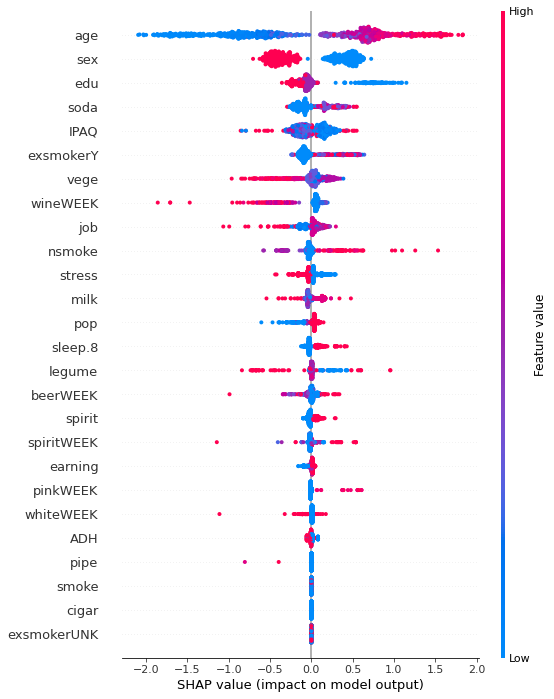

In [ ]:
#shap.plots.beeswarm(shap_values_gb, max_display= 60)

###  <a id = "4.2"> 4.2 - Gradient Boosting con validacion cruzada

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Correct classification rate: 0.7288135593220338
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75       160
         1.0       0.71      0.70      0.70       135

    accuracy                           0.73       295
   macro avg       0.73      0.73      0.73       295
weighted avg       0.73      0.73      0.73       295

Confusion matrix, without normalization
[[121  39]
 [ 41  94]]


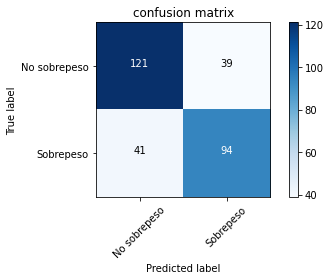

In [ ]:
#Gradient Boosting con validacion cruzada
params = [{'loss': ['deviance', 'exponential']}]

modelo = GridSearchCV(modelo, params, cv=5, scoring='recall', verbose=10, n_jobs=3)

modelo.fit(train_features, train_labels)

prediccion = modelo.predict(test_features)
report = classification_report(test_labels, prediccion)
rms = sqrt(mean_squared_error(test_labels, prediccion))
print("Correct classification rate:", accuracy_score(test_labels, prediccion))

print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')

plt.show()


###  <a id = "4.3 "> 4.3 - Logistic Regression

Correct classification rate: 0.7186440677966102
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74       160
         1.0       0.69      0.71      0.70       135

    accuracy                           0.72       295
   macro avg       0.72      0.72      0.72       295
weighted avg       0.72      0.72      0.72       295

Confusion matrix, without normalization
[[116  44]
 [ 39  96]]


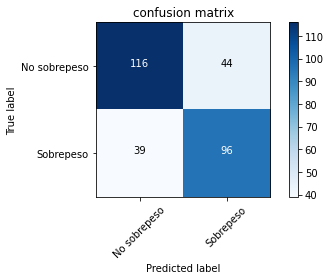

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

modelo = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.5, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=None, 
                            solver='lbfgs', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=3)
modelo.fit(train_features, train_labels)
prediccion = modelo.predict(test_features)
proba =  modelo.predict_proba(test_features)

    
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))

print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')

plt.show()

### <a id = "4.4 ">4.4 - Random Forest Regressor

Correct classification rate: 0.7186440677966102
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73       160
         1.0       0.68      0.72      0.70       135

    accuracy                           0.72       295
   macro avg       0.72      0.72      0.72       295
weighted avg       0.72      0.72      0.72       295

Confusion matrix, without normalization
[[115  45]
 [ 38  97]]


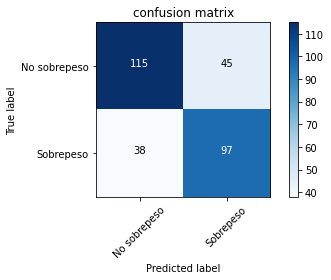

In [ ]:
#Random Forest Regressor
modelo = RandomForestRegressor(n_estimators=350, oob_score = True, random_state=0, n_jobs=3)
modelo.fit(train_features, train_labels)
prediccion = modelo.predict(test_features)
prediccion = np.round(prediccion)
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))

print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()

###  <a id = "4.5 "> 4.5 - RandomForestClassifier

Correct classification rate: 0.7491525423728813
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76       160
         1.0       0.71      0.76      0.74       135

    accuracy                           0.75       295
   macro avg       0.75      0.75      0.75       295
weighted avg       0.75      0.75      0.75       295

Confusion matrix, without normalization
[[118  42]
 [ 32 103]]


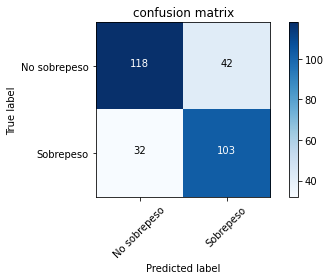

In [ ]:

modelo = RandomForestClassifier(criterion='gini', random_state=0)
modelo.fit(train_features, train_labels)

prediccion = modelo.predict(test_features)
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))


print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()

### <a id = "4.6 ">4.6 - GridSearchCV 
<span style="color:red"> CUIDADO ESTE TARDA <span>
Descomentar si se quiere usar
    

### <a id = "4.7 ">4.7 - GaussianProcessClassifier

Correct classification rate: 0.6067796610169491
              precision    recall  f1-score   support

         0.0       0.64      0.61      0.63       160
         1.0       0.57      0.60      0.58       135

    accuracy                           0.61       295
   macro avg       0.61      0.61      0.61       295
weighted avg       0.61      0.61      0.61       295

Confusion matrix, without normalization
[[98 62]
 [54 81]]


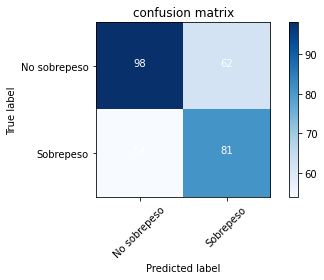

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
modelo = GaussianProcessClassifier(kernel=kernel,random_state=0)
modelo.fit(train_features, train_labels)
prediccion = modelo.predict(test_features)
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))
print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()

### <a id = "4.8 "> 4.8 - Gaussian Naive Bayes

Correct classification rate: 0.6813559322033899
              precision    recall  f1-score   support

         0.0       0.68      0.79      0.73       160
         1.0       0.69      0.55      0.61       135

    accuracy                           0.68       295
   macro avg       0.68      0.67      0.67       295
weighted avg       0.68      0.68      0.68       295

Confusion matrix, without normalization
[[127  33]
 [ 61  74]]


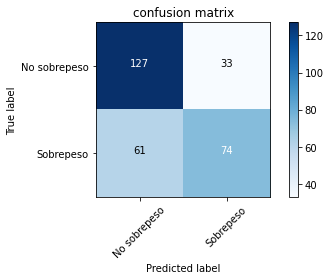

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelo= GaussianNB()
modelo.fit(train_features, train_labels)
prediccion = modelo.predict(test_features)
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))
print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()

###  <a id = "4.9 "> 4.9 - Bernoulli Naive Bayes

Correct classification rate: 0.6406779661016949
              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64       160
         1.0       0.59      0.70      0.64       135

    accuracy                           0.64       295
   macro avg       0.64      0.65      0.64       295
weighted avg       0.65      0.64      0.64       295

Confusion matrix, without normalization
[[95 65]
 [41 94]]


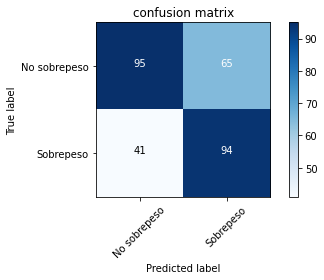

In [ ]:
from sklearn.naive_bayes import BernoulliNB
modelo = BernoulliNB()
modelo.fit(train_features, train_labels)
prediccion = modelo.predict(test_features)
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))
print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()

###  <a id = "4.10 "> 4.10 - DecisionTreeClassifier

Correct classification rate: 0.6949152542372882
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       160
         1.0       0.68      0.63      0.65       135

    accuracy                           0.69       295
   macro avg       0.69      0.69      0.69       295
weighted avg       0.69      0.69      0.69       295

Confusion matrix, without normalization
[[120  40]
 [ 50  85]]


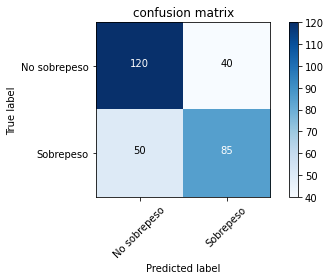

In [ ]:
from sklearn import tree

modelo = tree.DecisionTreeClassifier(random_state=0,max_depth=6)
modelo.fit(train_features, train_labels)
prediccion = modelo.predict(test_features)
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))
print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()

### <a id = "4.11 "> 4.11 - AdaBoostClassifier

Correct classification rate: 0.6305084745762712
              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64       160
         1.0       0.58      0.67      0.62       135

    accuracy                           0.63       295
   macro avg       0.63      0.63      0.63       295
weighted avg       0.64      0.63      0.63       295

Confusion matrix, without normalization
[[96 64]
 [45 90]]


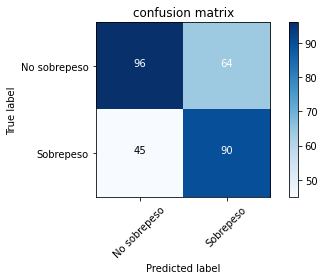

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
modelo = AdaBoostClassifier(tree.DecisionTreeClassifier(),
                         algorithm="SAMME",
                         n_estimators=500)
modelo.fit(train_features, train_labels)
prediccion = modelo.predict(test_features)
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))
print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()

###  <a id = "4.12 "> 4.12 - BaggingClassifier

Correct classification rate: 0.7186440677966102
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73       160
         1.0       0.68      0.72      0.70       135

    accuracy                           0.72       295
   macro avg       0.72      0.72      0.72       295
weighted avg       0.72      0.72      0.72       295

Confusion matrix, without normalization
[[115  45]
 [ 38  97]]


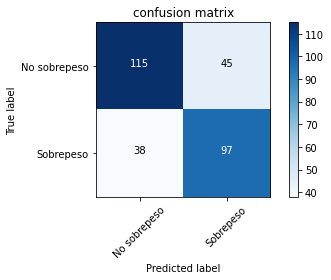

In [ ]:
from sklearn.ensemble import BaggingClassifier
modelo=BaggingClassifier(  n_estimators = 250 , max_samples = 1.0 ,
                           bootstrap = True , bootstrap_features = False ,
                         oob_score = False , warm_start = False , n_jobs = None , random_state = 0 , verbose = 0 )
modelo.fit(train_features, train_labels)
prediccion = modelo.predict(test_features)
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))
print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()

###  <a id = "4.13 "> 4.13 - ExtraTreesClassifier

Correct classification rate: 0.7322033898305085
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       160
         1.0       0.70      0.72      0.71       135

    accuracy                           0.73       295
   macro avg       0.73      0.73      0.73       295
weighted avg       0.73      0.73      0.73       295

Confusion matrix, without normalization
[[119  41]
 [ 38  97]]


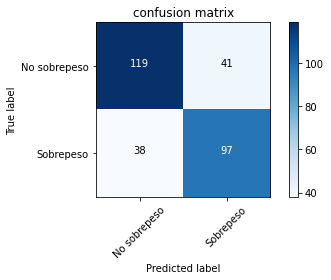

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
modelo.fit(train_features, train_labels)
prediccion = modelo.predict(test_features)
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))
print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()

### <a id = "4.14 "> 4.14 - SGDClassifier

Correct classification rate: 0.7322033898305085
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       160
         1.0       0.70      0.72      0.71       135

    accuracy                           0.73       295
   macro avg       0.73      0.73      0.73       295
weighted avg       0.73      0.73      0.73       295

Confusion matrix, without normalization
[[119  41]
 [ 38  97]]


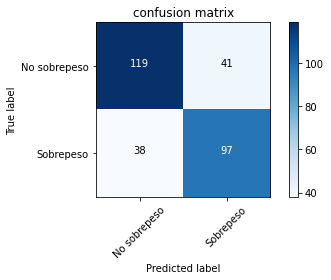

In [ ]:
from sklearn import linear_model
modelo== linear_model.SGDClassifier(max_iter=1000, tol=1e-3)

modelo.fit(train_features, train_labels)
prediccion = modelo.predict(test_features)
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))
print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()

## Redes neuronales

### <a id = "4.15 "> 4.15 - MLPClassifier

Correct classification rate: 0.6271186440677966
              precision    recall  f1-score   support

         0.0       0.61      0.85      0.71       160
         1.0       0.67      0.36      0.47       135

    accuracy                           0.63       295
   macro avg       0.64      0.61      0.59       295
weighted avg       0.64      0.63      0.60       295

Confusion matrix, without normalization
[[136  24]
 [ 86  49]]


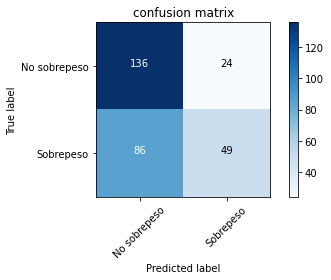

In [ ]:
from sklearn.neural_network import MLPClassifier
modelo=MLPClassifier(alpha=1)
modelo.fit(train_features, train_labels)
prediccion = modelo.predict(test_features)
report = classification_report(test_labels, prediccion)
print("Correct classification rate:", accuracy_score(test_labels, prediccion))
print(report)

cnf_matrix = confusion_matrix(test_labels, prediccion)
plot_confusion_matrix(cnf_matrix, classes=array_clases,
                          title='confusion matrix')
plt.show()